# EDA  Fake News

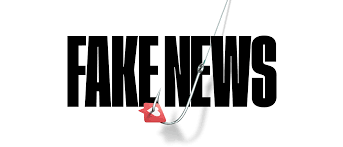

Hoy en día vivimos en una sociedad donde estamos bombardeados de noticias, por lo que surge un gran problema como sociedad debido a que muchas de ellas no son reales, las denominadas Fake News, este proyecto trata en primer lugar, explorar la base de datos extraida de Kaggle de noticias de Estados Unidos. 

## 1. Definicion del Problema

### 1.1 Objetivo
### 1.2 Tipo de problema
### 1.3 Establecer métricas de éxito
### 1.4 Definir impacto

## Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import spacy
from nltk.corpus import stopwords


## Carga de datos

In [2]:
data= pd.read_csv('/Users/isaromobru/Desktop/FakeNews 10.57.24/proyecto_machine_learning_Fake_News/data/raw/noticias_fake_true.csv')
data

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


## 2. Recolección y Eploración de datos

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [4]:
"""Muestra información básica del DataFrame"""
print("\n=== INFORMACIÓN BÁSICA DEL DATASET ===")
print("\nDimensiones del DataFrame:", data.shape)
print("\nColumnas del DataFrame:", list(data.columns))
print("\nTipos de datos:")
print(data.dtypes)
print("\nValores nulos por columna:")
print(data.isnull().sum())
#print("\nColumnas numéricas:", list(numeric_columns))


=== INFORMACIÓN BÁSICA DEL DATASET ===

Dimensiones del DataFrame: (44898, 5)

Columnas del DataFrame: ['title', 'text', 'subject', 'date', 'label']

Tipos de datos:
title      object
text       object
subject    object
date       object
label       int64
dtype: object

Valores nulos por columna:
title      0
text       0
subject    0
date       0
label      0
dtype: int64


Los tipos de datos la mayoría son object, por lo que estaría bien cambiarlos a categoricos y la categoría date en time

In [5]:
data.subject.value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

los subject al ser la unión de dos dataset sintetizar los datos en subject más goblales 

## Balanceo de la target

In [6]:
data.label.value_counts()

label
0    23481
1    21417
Name: count, dtype: int64

los datos están casi balanceados con 23.478 datos Fake y 21211 datos True 

In [3]:
# Primero, crear un conteo de noticias por subject y label
count_data = data.groupby(['subject', 'label']).size().reset_index(name='count')

# Luego crear la tabla pivote
pivot = count_data.pivot_table(
    index='subject',
    columns='label',
    values='count',
    fill_value=0
)

# Mostrar los resultados
print("\nDistribución de noticias por tema y etiqueta:")
print(pivot)

# Opcional: Agregar totales por fila y columna
pivot['Total por tema'] = pivot.sum(axis=1)
pivot.loc['Total por etiqueta'] = pivot.sum()

# Mostrar la tabla con totales
print("\nDistribución con totales:")
print(pivot)


Distribución de noticias por tema y etiqueta:
label                 0        1
subject                         
Government News  1570.0      0.0
Middle-east       778.0      0.0
News             9050.0      0.0
US_News           783.0      0.0
left-news        4459.0      0.0
politics         6841.0      0.0
politicsNews        0.0  11272.0
worldnews           0.0  10145.0

Distribución con totales:
label                     0        1  Total por tema
subject                                             
Government News      1570.0      0.0          1570.0
Middle-east           778.0      0.0           778.0
News                 9050.0      0.0          9050.0
US_News               783.0      0.0           783.0
left-news            4459.0      0.0          4459.0
politics             6841.0      0.0          6841.0
politicsNews            0.0  11272.0         11272.0
worldnews               0.0  10145.0         10145.0
Total por etiqueta  23481.0  21417.0         44898.0


Algunos subject (como Government News, Middle-east, News, etc.) solo tienen noticias falsas (0), mientras que otros (politicsNews, worldnews) solo tienen noticias verdaderas (1).
Es posible que haya un sesgo en los datos o que los datos de ciertos temas estén desequilibrados, con una categoría que tiene muchas noticias verdaderas y ninguna falsa (o viceversa).

In [8]:
data.describe()

,label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


- El valor promedio de la columna label es 0.477, lo que confirma que las clases están bastante equilibradas.
- La desviación estándar es 0.499, lo que indica una buena dispersión entre las clases.

In [9]:
data.duplicated().sum()

np.int64(209)

## 3. Limpieza y preprocesamiento

### Limpieza de duplicados

In [4]:
data.drop_duplicates(inplace=True)

como se puede observar habia 209 duplicados, por lo que he eliminado las noticias duplicadas ya que puede causar sesgos a la hora de predecir, finalmente ha quedado en 44689 la muestra de 44897 que había antes.

### Normalización del texto (stopWords & Stemming)

In [5]:
# Cargar modelo spaCy optimizado sin NER (más rápido)
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    doc = nlp(text)  # Procesa el texto con spaCy
    processed_words = [token.lemma_ for token in doc if token.text.lower() not in stop_words and not token.is_punct]
    return ' '.join(processed_words)

# Aplicar la función más rápido con multiprocessing
data['text'] = data['text'].apply(preprocess_text)
data['title'] = data['title'].apply(preprocess_text)


El código que compartes es adecuado para el procesamiento de datos textuales, por varias razones:

Optimización del pipeline de spaCy:
Al cargar el modelo con disable=["ner", "parser"], se desactivan funcionalidades que no necesitas (reconocimiento de entidades y análisis sintáctico), lo que acelera el procesamiento y reduce el consumo de recursos.
Uso de lematización:
Utilizar token.lemma_ transforma cada palabra a su forma canónica, lo que ayuda a reducir la variabilidad del lenguaje y mejora la consistencia en la representación del texto.
Eliminación de stop words:
Al filtrar las palabras vacías (stop words) mediante if token.text.lower() not in stop_words, se elimina ruido y se conservan las palabras más relevantes para el análisis.
Exclusión de signos de puntuación:
La condición and not token.is_punct garantiza que se excluyan los signos de puntuación, ayudando a concentrarse en el contenido semántico del texto.
Aplicación uniforme a múltiples campos:
El hecho de aplicar el mismo preprocesamiento tanto a la columna text como a la columna title asegura que ambos campos se normalicen de manera coherente.
Enfoque para acelerar el procesamiento:
Aunque el código muestra el uso de apply, el comentario indica que se ha considerado el uso de multiprocessing para procesar los datos más rápidamente, lo cual es útil cuando se trabaja con grandes volúmenes de datos.
Estos puntos en conjunto hacen que el preprocesamiento sea eficiente y adecuado para tareas de análisis de texto, siempre y cuando la tarea no requiera la información que proporcionan las funcionalidades deshabilitadas (como el análisis sintáctico o el reconocimiento de entidades).

In [9]:
data

,title,text,subject,date,label
0,U.S. budget fight loom Republicans flip fiscal...,WASHINGTON Reuters head conservative republica...,politicsNews,"December 31, 2017",1
1,U.S. military accept transgender recruit Monda...,WASHINGTON Reuters Transgender people allow fi...,politicsNews,"December 29, 2017",1
2,senior U.S. republican senator let Mr. Mueller...,WASHINGTON Reuters special counsel investigati...,politicsNews,"December 31, 2017",1
3,FBI Russia probe help australian diplomat tip NYT,WASHINGTON Reuters trump campaign adviser Geor...,politicsNews,"December 30, 2017",1
4,trump want Postal Service charge much Amazon s...,SEATTLE WASHINGTON Reuters President Donald Tr...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,mcpain John McCain Furious Iran treat US Sailo...,21st Century Wire say 21wire report early week...,Middle-east,"January 16, 2016",0
44894,justice Yahoo Settles E mail Privacy Class act...,21st Century Wire say familiar theme whenever ...,Middle-east,"January 16, 2016",0
44895,Sunnistan US Allied safe zone plan take Territ...,Patrick Henningsen 21st Century WireRemember...,Middle-east,"January 15, 2016",0
44896,blow $ 700 million Al Jazeera America finally ...,21st Century Wire say Al Jazeera America go hi...,Middle-east,"January 14, 2016",0


PorterStemmer: Es un algoritmo que reduce las palabras a su raíz o forma base. Por ejemplo:

"running" -> "run"
"fishing" -> "fish"
"connected" -> "connect"


stopwords: Son palabras muy comunes que generalmente no aportan significado importante al análisis (como "the", "is", "at", "which", etc.)
Crea una instancia del stemmer
Obtiene el conjunto de stopwords en inglés


La función de preprocesamiento:
Esta función:

Recibe un texto como entrada
Lo divide en palabras individuales con split()
Usa una comprensión de lista para:

Filtrar las stopwords (if word not in stop_words)
Aplicar stemming a cada palabra restante (stemmer.stem(word))


Une las palabras procesadas de nuevo en un solo string
Aplica la función de preprocesamiento a cada entrada en la columna 'text' del DataFrame
Este preprocesamiento es común en análisis de texto y NLP porque:

Reduce la dimensionalidad del texto eliminando palabras no informativas
Normaliza las palabras a formas base, lo que ayuda a identificar palabras similares
Hace el texto más adecuado para análisis computacional



In [6]:
data.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [7]:
data.copy() # para no perder los datos ya que tarda mucho

,title,text,subject,date,label
0,U.S. budget fight loom Republicans flip fiscal...,WASHINGTON Reuters head conservative republica...,politicsNews,"December 31, 2017",1
1,U.S. military accept transgender recruit Monda...,WASHINGTON Reuters Transgender people allow fi...,politicsNews,"December 29, 2017",1
2,senior U.S. republican senator let Mr. Mueller...,WASHINGTON Reuters special counsel investigati...,politicsNews,"December 31, 2017",1
3,FBI Russia probe help australian diplomat tip NYT,WASHINGTON Reuters trump campaign adviser Geor...,politicsNews,"December 30, 2017",1
4,trump want Postal Service charge much Amazon s...,SEATTLE WASHINGTON Reuters President Donald Tr...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,mcpain John McCain Furious Iran treat US Sailo...,21st Century Wire say 21wire report early week...,Middle-east,"January 16, 2016",0
44894,justice Yahoo Settles E mail Privacy Class act...,21st Century Wire say familiar theme whenever ...,Middle-east,"January 16, 2016",0
44895,Sunnistan US Allied safe zone plan take Territ...,Patrick Henningsen 21st Century WireRemember...,Middle-east,"January 15, 2016",0
44896,blow $ 700 million Al Jazeera America finally ...,21st Century Wire say Al Jazeera America go hi...,Middle-east,"January 14, 2016",0


In [24]:
data.to_csv('processedstopword2.csv', index=False)

## Visualizaciones

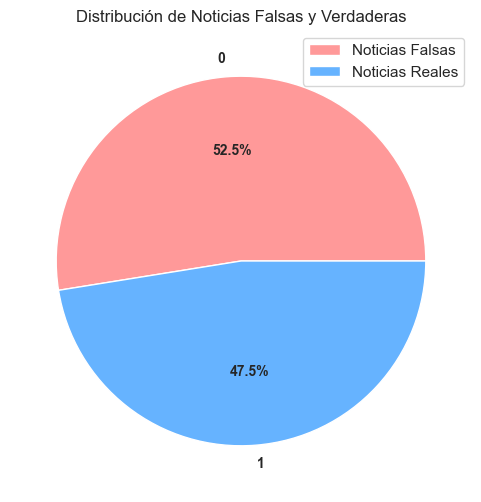

In [8]:

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Contar la distribución de las etiquetas
label_counts = data['label'].value_counts()

# Definir una lista de colores personalizados
colors = ['#ff9999', '#66b3ff']  # Puedes añadir más colores si tienes más categorías

# Crear la gráfica de pie con colores personalizados
plt.figure(figsize=(6, 6))
plt.pie(
    x=label_counts.values,
    labels=label_counts.keys(),
    autopct="%1.1f%%",
    textprops={"fontsize": 10, "fontweight": "bold"},
    colors=colors  # Aplicamos los colores personalizados
)

# Añadir título
plt.title('Distribución de Noticias Falsas y Verdaderas')
plt.legend(["Noticias Falsas" , "Noticias Reales"])

# Mostrar el gráfico
plt.show()


Podemos observar que tenemos una proporcion bastante similar de noticias falsas y verdaderas. Las verdaderas son 21417, es decir, 47,5% y las falsas 23481, es decir, 52,5%. Por lo que muestra que esta bastante equilibrado

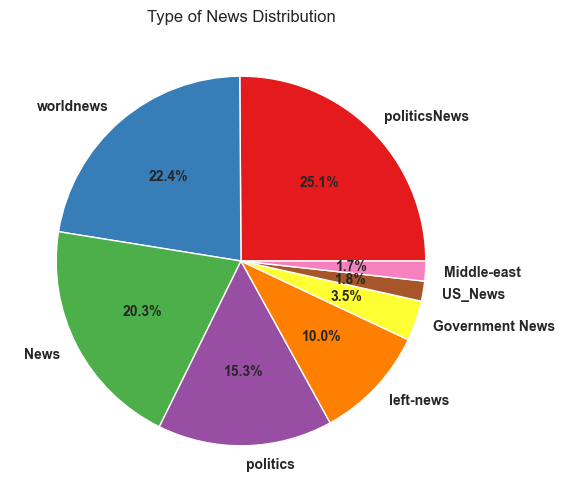

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Contar la distribución de las categorías en 'subject'
subject_counts = data['subject'].value_counts()

# Obtener una paleta de colores de Seaborn
colors = sns.color_palette('Set1', len(subject_counts))  # Paleta con colores brillantes

# Crear el gráfico de pie
plt.figure(figsize=(6, 6))
plt.pie(
    x=subject_counts.values,
    labels=subject_counts.keys(),
    autopct="%1.1f%%",
    textprops={"fontsize": 10, "fontweight": "bold"},
    colors=colors  # Usamos la paleta de colores de Seaborn
)

# Título del gráfico
plt.title('Type of News Distribution')

# Mostrar el gráfico
plt.show()


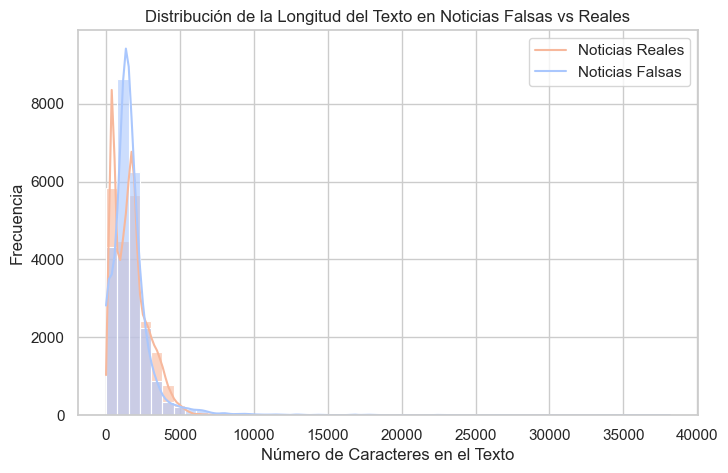

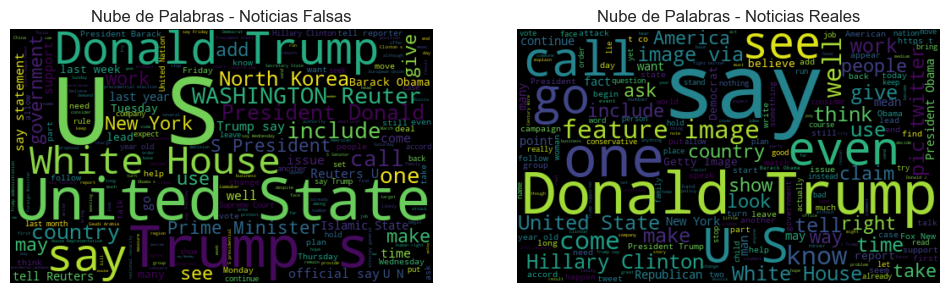

In [10]:
from wordcloud import WordCloud

# Calcular la longitud de los textos
data["text_length"] = data["text"].apply(len)

# Gráfico de distribución de la longitud de los textos por tipo de noticia
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="text_length", hue="label", bins=50, kde=True, palette="coolwarm", alpha=0.6)
plt.title("Distribución de la Longitud del Texto en Noticias Falsas vs Reales")
plt.xlabel("Número de Caracteres en el Texto")
plt.ylabel("Frecuencia")
plt.legend(["Noticias Reales", "Noticias Falsas"])
plt.show()

# Generar nubes de palabras para cada tipo de noticia
fake_text = " ".join(data[data["label"] == 1]["text"])
real_text = " ".join(data[data["label"] == 0]["text"])

plt.figure(figsize=(12, 5))

# Nube de palabras para noticias falsas
plt.subplot(1, 2, 1)
wordcloud_fake = WordCloud(width=500, height=300, background_color='black').generate(fake_text)
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.title("Nube de Palabras - Noticias Falsas")
plt.axis("off")

# Nube de palabras para noticias reales
plt.subplot(1, 2, 2)
wordcloud_real = WordCloud(width=500, height=300, background_color='black').generate(real_text)
plt.imshow(wordcloud_real, interpolation="bilinear")
plt.title("Nube de Palabras - Noticias Reales")
plt.axis("off")

plt.show()


## Análisis de las nubes de palabras
- Palabras comunes en ambas nubes
    1. Palabras como "said" (dijo), "US" (Estados Unidos), "donald trump", "state", y "call" aparecen con frecuencia en ambas categorías.
    2. Esto indica que el contenido de las noticias falsas y reales usa términos similares, lo que puede hacer más difícil diferenciarlas basándose solo en palabras individuales.
- Diferencias entre Noticias Falsas y Reales
    1. En noticias falsas, vemos términos como "white house" (Casa Blanca), "reuters", "washington", y "include".
    Esto sugiere que muchas noticias falsas pueden tratar sobre política o imitar reportes de agencias de noticias.
    2. En noticias reales, destacan palabras como "think" (piensa), "reporter" (reportero), "twitter", "believe" (cree), y "time" (tiempo).Esto indica que las noticias reales pueden enfocarse más en reportes de periodistas y en opiniones públicas.
    3. Presencia de nombres propios y figuras públicas. En ambas categorías, aparecen nombres como "Donald Trump", "Hillary Clinton", y "Obama".Esto puede indicar que muchas de las noticias, tanto reales como falsas, se centran en figuras políticas importantes.

## Análisis de distribución de Longitud de Texto
- Patrón de distribución similar
- Tanto las noticias falsas (azul) como las reales (naranja) siguen una distribución altamente sesgada a la izquierda, lo que indica que la mayoría de las noticias tienen una longitud relativamente corta.Esto sugiere que los textos de noticias, sean falsos o reales, suelen ser de pocas palabras, con pocos ejemplos de noticias demasiado largas.
- Pico de frecuencia: Hay una alta concentración de noticias con menos de 5,000 caracteres.
- Las noticias falsas parecen tener picos más marcados en ciertas longitudes, lo que puede indicar que siguen ciertos patrones en su estructura.
- Noticias extremadamente largas: Aunque es poco frecuente, hay algunas noticias con más de 10,000 caracteres.
Esto podría representar reportajes extensos o artículos detallados, que suelen ser más comunes en noticias reales.
- Las noticias falsas tienden a tener una longitud de texto ligeramente más consistente (menos variab

Próximo paso: Podemos analizar métricas adicionales, como cantidad de palabras, promedio de palabras por oración y distribución de palabras clave, para identificar más diferencias entre ambas categorías.

https://oa.upm.es/71778/1/TFG_INNA_KRASIMIROVA_HRISTOVA.pdf

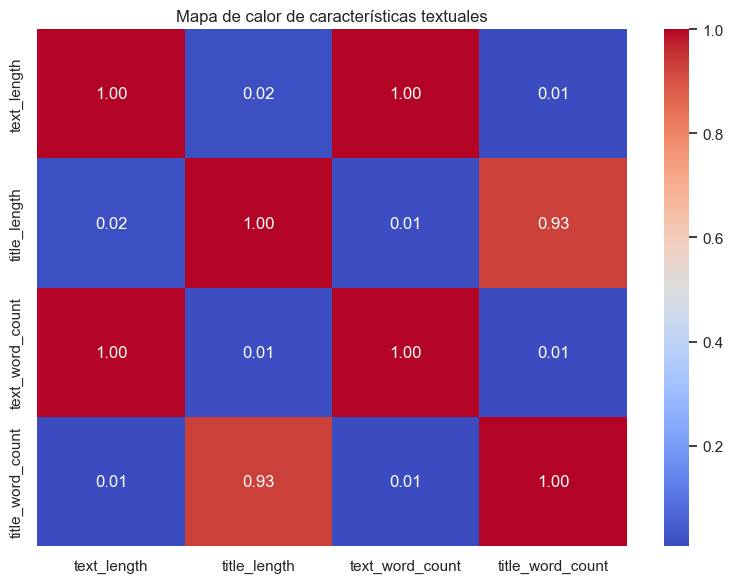

In [13]:
# Crear nuevas columnas para extraer características numéricas de los textos
data['text_length'] = data['text'].apply(lambda x: len(x) if isinstance(x, str) else 0)
data['title_length'] = data['title'].apply(lambda x: len(x) if isinstance(x, str) else 0)
data['text_word_count'] = data['text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
data['title_word_count'] = data['title'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Seleccionar las columnas que queremos analizar
features = ['text_length', 'title_length', 'text_word_count', 'title_word_count']
corr_matrix = data[features].corr()

# Configurar el mapa de calor usando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor de características textuales")
plt.tight_layout()



## Tratamiento de Subject

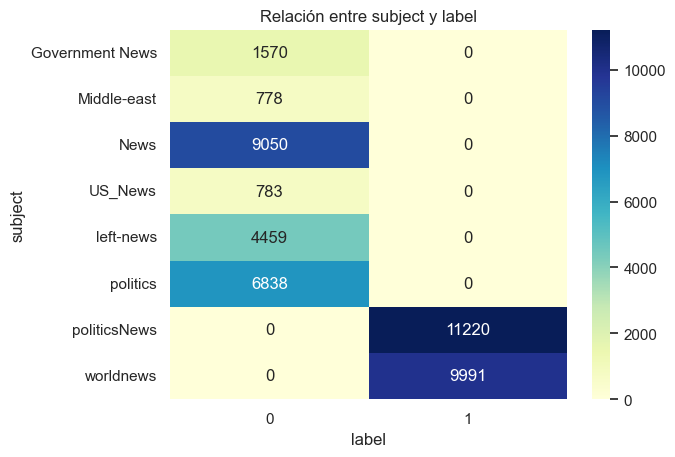

In [18]:


tabla = pd.crosstab(data['subject'], data['label'])


sns.heatmap(tabla, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Relación entre subject y label")
plt.show()

In [20]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla)
print("Chi-cuadrado:", chi2)
print("Valor p:", p)

Chi-cuadrado: 44689.0
Valor p: 0.0


Distribución Perfectamente Separada:

Para label = 0, todos los registros pertenecen a Government News, Middle-east, News, US_News, left-news o politics.
Para label = 1, todos los registros pertenecen a politicsNews o worldnews.
Esto indica que la variable subject separa completamente las clases. En otras palabras, con solo mirar la columna subject puedes saber cuál es la etiqueta label.
Valor p = 0.0:
El valor p tan bajo (prácticamente cero) confirma que existe una dependencia muy fuerte entre subject y label. De hecho, es un caso de separación perfec

Riesgo de Data Leakage:
Si tu objetivo es entrenar un modelo para detectar noticias falsas (o la etiqueta que definas) basándose en el contenido de la noticia y no en metadatos que ya “cantan” la clase, usar la variable subject tal cual podría ocasionar que el modelo “aprenda” una regla trivial. Esto se denomina data leakage, porque el modelo descubre un patrón que no se corresponde con el fenómeno real que quieres estudiar (detección de fake news), sino con la forma en que los datos fueron etiquetados o estructurados.

In [14]:
# reagrupación
mapping = {
    'Government News': 'politics',      
    'Middle-east': 'general',     
    'News': 'general',                 
    'US_News': 'general',               
    'left-news': 'politics',          
    'politics': 'politics',
    'politicsNews': 'politics',
    'worldnews': 'general'
}

data['subject_grouped'] = data['subject'].map(mapping)


agrupacion como politics o general para asi conseguir menos sesgo y no se cree problemas de data Lekeage a la hora de realizar los modelos 

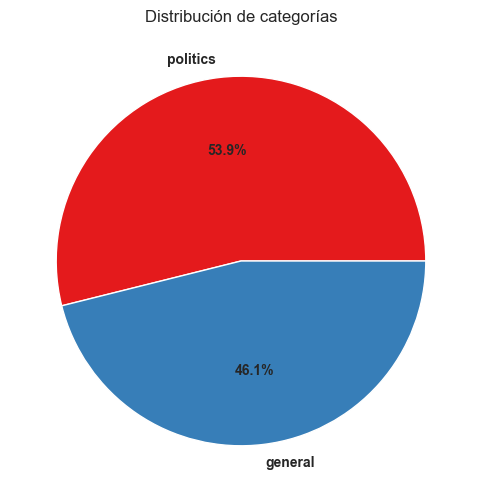

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Contar la distribución de las categorías en 'subject'
subject_counts = data['subject_grouped'].value_counts()

# Obtener una paleta de colores de Seaborn
colors = sns.color_palette('Set1', len(subject_counts))  # Paleta con colores brillantes

# Crear el gráfico de pie
plt.figure(figsize=(6, 6))
plt.pie(
    x=subject_counts.values,
    labels=subject_counts.keys(),
    autopct="%1.1f%%",
    textprops={"fontsize": 10, "fontweight": "bold"},
    colors=colors  # Usamos la paleta de colores de Seaborn
)

# Título del gráfico
plt.title('Distribución de categorías')

# Mostrar el gráfico
plt.show();


## Guadar la base de datos con transformaciones 

In [16]:
import os
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'data'
folder_path = '/Users/isaromobru/Desktop/FakeNews 10.57.24/proyecto_machine_learning_Fake_News/data/processed'  

# Si la carpeta no existe, la crea
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Define la ruta completa del archivo
file_path = os.path.join(folder_path, 'archivo.csv')

# Guarda el DataFrame en el archivo CSV sin incluir el índice
data.to_csv(file_path, index=False)
